In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
from rdkit.Chem import rdFingerprintGenerator
from rdkit import Chem

dpath = "PSet03_files/"




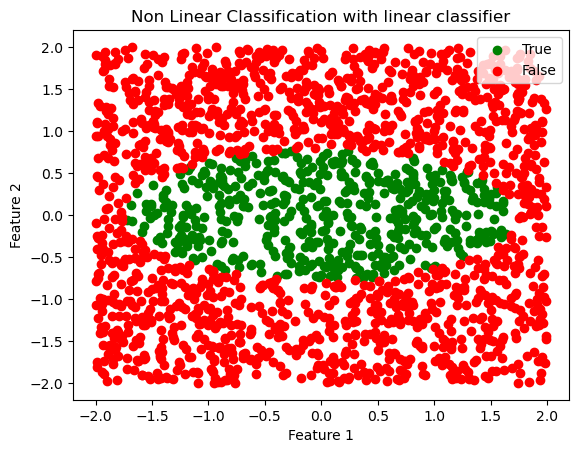

Shape of the training set:  (1600, 2)
Shape of the testing set:  (400, 2)
Shape of the training labels:  (1600,)
Shape of the testing labels:  (400,)


In [5]:
# 1) Non Linear Classification with linear classifier

data = np.load(dpath + "Xs.npy")
labels = np.load(dpath + "Ys.npy")

# Plot the data and the labels using different colors for each class
plt.scatter(data[labels == True, 0], data[labels == True, 1], color="green", label="True")
plt.scatter(data[labels == False, 0], data[labels == False, 1], color="red", label="False")

plt.title("Non Linear Classification with linear classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="upper right")
plt.show()

# split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(data, labels, test_size =0.2,
random_state =42)

print("Shape of the training set: ", X_train.shape)
print("Shape of the testing set: ", X_test.shape)
print("Shape of the training labels: ", y_train.shape)
print("Shape of the testing labels: ", y_test.shape)



Accuracy: 0.595


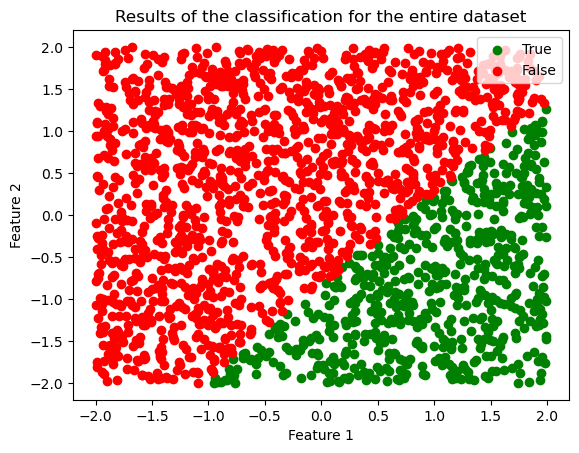

In [6]:
# Train a Perceptron model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
# return the weights and bias
w = perceptron.coef_
b = perceptron.intercept_

# Evaluate the model on the testing set
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the results of the classification for the entire dataset
y_all_pred = perceptron.predict(data)
plt.scatter(data[y_all_pred == True, 0], data[y_all_pred == True, 1], color="green", label="True")
plt.scatter(data[y_all_pred == False, 0], data[y_all_pred == False, 1], color="red", label="False")
plt.title("Results of the classification for the entire dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="upper right")
plt.show()




Length of a feature vector:  6
Shape of the testing set:  (400, 6)
Minimum value of the testing set:  -3.72
Maximum value of the testing set:  3.99
Accuracy of the polynomial classifier: 0.965


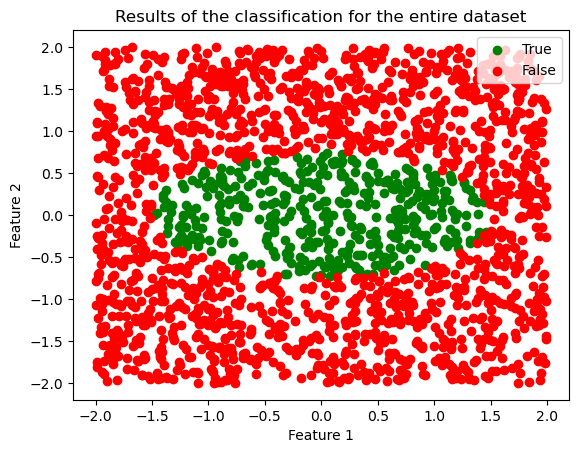

In [7]:
# Use polynomial features to create a non linear classifier
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
perceptron = Perceptron()
perceptron.fit(X_poly, y_train)

# transform the testing set
X_poly_test = poly.fit_transform(X_test)
# get length of a feature vector
print("Length of a feature vector: ", X_poly_test.shape[1])
print("Shape of the testing set: ", X_poly_test.shape)
print("Minimum value of the testing set: ", np.round(X_poly_test.min(), 2))
print("Maximum value of the testing set: ", np.round(X_poly_test.max(), 2))

# evaluate the model on the testing set
y_pred = perceptron.predict(X_poly_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the polynomial classifier: {accuracy}")

all_data_poly = poly.transform(data)
# Plot the results of the classification for the entire dataset
y_all_pred = perceptron.predict(all_data_poly)
plt.scatter(data[y_all_pred == True, 0], data[y_all_pred == True, 1], color="green", label="True")
plt.scatter(data[y_all_pred == False, 0], data[y_all_pred == False, 1], color="red", label="False")
plt.title("Results of the classification for the entire dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="upper right")
plt.show()



In [8]:
# 2) Solubility dataset
data = pd.read_csv(dpath + "solubility_dataset.csv")
data['molecules'] = data['SMILES'].apply(Chem.MolFromSmiles)




[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not removing hydrogen atom without neighbors
[10:09:50] WARNING: not r

In [9]:
print("Mean of MolLogP: ", data['MolLogP'].mean())
print("Standard deviation of MolLogP: ", data['MolLogP'].std())
print("Minimum of MolLogP: ", data['MolLogP'].min())
print("Maximum of MolLogP: ", data['MolLogP'].max())


# Create binary labels based on MolLogP
data['y_sol'] = data['MolLogP'] > 0
print(data['y_sol'].head())

# Count how many molecules are more soluble in an organic solvent (i.e., where MolLogP > 0)
sum = np.array([1 if x > 0 else 0 for x in data['MolLogP']]).sum()
print("Number of molecules more soluble in organic solvent: ", sum)

Mean of MolLogP:  1.9791671568823892
Standard deviation of MolLogP:  3.517737875091663
Minimum of MolLogP:  -40.87319999999999
Maximum of MolLogP:  68.54113999999966
0    True
1    True
2    True
3    True
4    True
Name: y_sol, dtype: bool
Number of molecules more soluble in organic solvent:  8245


In [10]:
# Task 2.2 & 2.3

## featurize molecules
fp_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize =2048)
x_count = np.array(np.array([fp_gen.GetCountFingerprint(mol).ToList() for mol in data['molecules']]))
print("Shape of the count fingerprint: ", x_count.shape)
x_fp = np.array(np.array([fp_gen.GetFingerprint(mol).ToList() for mol in data['molecules']]))
print("Shape of the fingerprint: ", x_fp.shape)


Per_FP = Perceptron()
x_fp_train, x_fp_test, y_train, y_test = train_test_split(x_fp, data['y_sol'], test_size=0.2, random_state=42)
Per_FP.fit(x_fp_train, y_train)
y_fp_pred = Per_FP.predict(x_fp_test)
accuracy_fp = accuracy_score(y_test, y_fp_pred)
print(f"Accuracy of the fingerprint classifier: {np.round(accuracy_fp, 3)}")

Per_Count = Perceptron()
x_count_train, x_count_test, y_train, y_test = train_test_split(x_count, data['y_sol'], test_size=0.2, random_state=42)
Per_Count.fit(x_count_train, y_train)
y_count_pred = Per_Count.predict(x_count_test)
accuracy_count = accuracy_score(y_test, y_count_pred)
print(f"Accuracy of the count fingerprint classifier: {np.round(accuracy_count, 3)}")



Shape of the count fingerprint:  (9982, 2048)
Shape of the fingerprint:  (9982, 2048)
Accuracy of the fingerprint classifier: 0.934
Accuracy of the count fingerprint classifier: 0.957


In [11]:
cov = []
for i in range(x_fp.shape[1]):
    mean_fp = x_fp[:, i].mean()
    mean_count = x_count[:, i].mean()
    cov.append(np.mean((x_fp[:, i] - mean_fp) * (x_count[:, i] - mean_count)))

print("Mean of the covariance: ", np.round(np.mean(cov), 3))



Mean of the covariance:  0.018


In [12]:
# Task 2.4

fp_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize =8)
x_count_8 = np.array(np.array([fp_gen.GetCountFingerprint(mol).ToList() for mol in data['molecules']]))
print("Shape of the count fingerprint: ", x_count_8.shape)

Poly_8 = PolynomialFeatures(degree=2)
x_poly_8 = Poly_8.fit_transform(x_count_8)
print("Shape of the polynomial features: ", x_poly_8.shape)

Per_Count_8 = Perceptron()

#create a new train and test set
x_count_8_train, x_count_8_test, y_train, y_test = train_test_split(x_count_8, data['y_sol'], test_size=0.2, random_state=42)
Per_Count_8.fit(x_count_8_train, y_train)
y_count_8_pred = Per_Count_8.predict(x_count_8_test)
accuracy_count_8 = accuracy_score(y_test, y_count_8_pred)
print(f"Accuracy of the count fingerprint classifier with degree 8: {np.round(accuracy_count_8, 3)}")



# train a model with polynomial features
x_poly_8_train, x_poly_8_test, y_train, y_test = train_test_split(x_poly_8, data['y_sol'], test_size=0.2, random_state=42)

Per_Count_8_poly = Perceptron()
Per_Count_8_poly.fit(x_poly_8_train, y_train)
y_count_8_poly_pred = Per_Count_8_poly.predict(x_poly_8_test)
accuracy_count_8_poly = accuracy_score(y_test, y_count_8_poly_pred)
print(f"Accuracy of the count fingerprint classifier with length 8 and polynomial features: {np.round(accuracy_count_8_poly, 3)}")


ratio = accuracy_count_8_poly / accuracy_count_8
print("Ratio = ", np.round(ratio, 3))

Shape of the count fingerprint:  (9982, 8)
Shape of the polynomial features:  (9982, 45)
Accuracy of the count fingerprint classifier with degree 8: 0.837
Accuracy of the count fingerprint classifier with length 8 and polynomial features: 0.767
Ratio =  0.916


# Task 2.5

## Separate into bins

- width of bins : 2.3
- center bins like this : 1.15, 3.45, 5.75, 8.05, 10.35, 12.65, 14.95



Shape of the count fingerprint:  (9982, 2048)
Accuracy of the count fingerprint classifier: 0.957
shape of features (2326, 2048)
Shape of y_pref (2326,)
Shape of labels (2326,)
Accuracy of at center 3.977: 1.0
shape of features (4232, 2048)
Shape of y_pref (4232,)
Shape of labels (4232,)
Accuracy of at center 1.677: 0.993
shape of features (182, 2048)
Shape of y_pref (182,)
Shape of labels (182,)
Accuracy of at center 8.577: 1.0
shape of features (35, 2048)
Shape of y_pref (35,)
Shape of labels (35,)
Accuracy of at center 13.177: 1.0
shape of features (50, 2048)
Shape of y_pref (50,)
Shape of labels (50,)
Accuracy of at center -9.823: 1.0
shape of features (1681, 2048)
Shape of y_pref (1681,)
Shape of labels (1681,)
Accuracy of at center -0.623: 0.934
shape of features (722, 2048)
Shape of y_pref (722,)
Shape of labels (722,)
Accuracy of at center 6.276999999999999: 1.0
shape of features (18, 2048)
Shape of y_pref (18,)
Shape of labels (18,)
Accuracy of at center -14.423: 1.0
shape of 

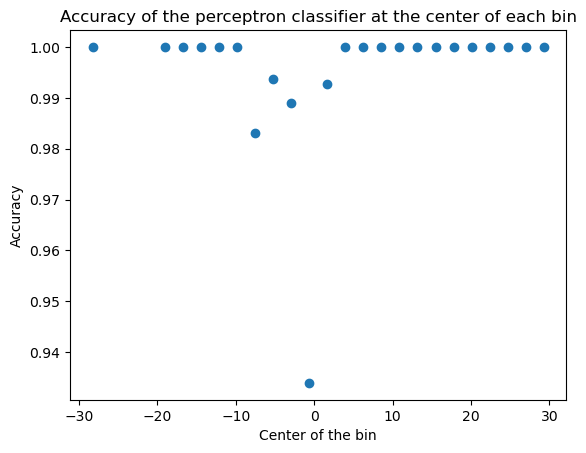

In [16]:
# Task 2.5#

fp_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize =2048)
x_count = np.array(np.array([fp_gen.GetCountFingerprint(mol).ToList() for mol in data['molecules']]))
print("Shape of the count fingerprint: ", x_count.shape)

x_count_train, x_count_test, y_train, y_test = train_test_split(x_count, data['y_sol'], test_size=0.2, random_state=42)
# Train the perceptron
Per_Count = Perceptron()
Per_Count.fit(x_count_train, y_train)
y_count_pred = Per_Count.predict(x_count_test)
accuracy_count = accuracy_score(y_test, y_count_pred)
print(f"Accuracy of the count fingerprint classifier: {np.round(accuracy_count, 3)}")

bin_width = 2.3
min_value = data['MolLogP'].min()  # The smallest value in the column
max_value = data['MolLogP'].max()  # The largest value in the column

# Define bin edges
bins = [min_value + i*bin_width for i in range(int((max_value - min_value) // bin_width) + 2)]



data['bin'] = pd.cut(data['MolLogP'], bins=bins, right=False)

# add coloumn in datafram that checks if that molecule is in the training set
for i in range(len(x_count_train)):
    data.loc[x_count_train[i], 'in_train'] = True

# go through each bin and count the number of molecules
results = []
centers = []
for bin in data['bin'].unique():
    center = bin.mid
    # filter if in_train is false and bin is the same as the current bin
    mols = data[data['bin'] == bin]['molecules']
    labels = data[data['bin'] == bin]['y_sol']
    features = np.array(np.array([fp_gen.GetCountFingerprint(mol).ToList() for mol in mols]))
    if  len(features) > 1:
        y_pred = Per_Count.predict(features)
        print("shape of features", features.shape)
        print("Shape of y_pref", y_pred.shape)
        print("Shape of labels", labels.shape)
        accuracy = accuracy_score(labels, y_pred)
        
        print(f"Accuracy of at center {center}: {np.round(accuracy, 3)}")
        results.append(accuracy)
        centers.append(center)
    else:
        print(f"No molecules in bin {bin}")
print(results)


#plot the results
plt.scatter(centers, results)
plt.title("Accuracy of the perceptron classifier at the center of each bin")
plt.xlabel("Center of the bin")
plt.ylabel("Accuracy")
plt.show()
    





In [17]:

# pick a bin and calculate the accuracy
bin = data['bin'].unique()[7]
center = bin.mid
logP  = data[data['bin'] == bin]['MolLogP']
labels = data[data['bin'] == bin]['y_sol']
mols = data[data['bin'] == bin]['molecules']
features = np.array(np.array([fp_gen.GetCountFingerprint(mol).ToList() for mol in mols]))
y_pred = Per_Count.predict(features)
print("Mean of logP in this bin: ", logP.mean())
print("shape of features", features.shape)
print("Shape of y_pref", y_pred.shape)
print("Shape of labels", labels.shape)
accuracy = accuracy_score(labels, y_pred)

print(f"Accuracy of at center {center}: {np.round(accuracy, 3)}")
results.append(accuracy)
centers.append(center)

Mean of logP in this bin:  -14.612472222222221
shape of features (18, 2048)
Shape of y_pref (18,)
Shape of labels (18,)
Accuracy of at center -14.423: 1.0
